# Linear Regression

In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.19.0


## Useful info

* **Input Layer:** Equal to no of input parameters
* **Hidden Layer:** Minimum 1, Maximum unlimited
* **Neurons Per Layer:** Specific to a problem, generally from 10 to 100
* **Output Layer Shape:** Depends on the prediction requirements. If Regression then 1, otherwise
* **Hidden Activation Function:** Usually ReLU
* **Output Activation:** None, ReLU, Logistic
* **Loss Function:** MSE (Mean Square Error), MAE (Mean Absolute Error), Huber (Combination of MAE & MSE) if there are outliers
* **Optimizer:** SGD, Adam

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)
plt.show()

## Steps in Modelling with TensorFlow

* **Creating a Model:** Piece together the layers of a Neural Network yourself or import previously built model (Transfer Learning)
* **Compiling:** Defining how a model performance should be measured (Loss/Metrics) as well as defining how it should improve (Optimizer)
* **Fitting a Model:** Letting the Model try to find patterns in the data.

## **HyperParameter**
In machine learning is something a data analyst or developer can set themselves.
## Parameter:
In machine Learning a parameter usually describes something that a model learns on its own.

In [ ]:
tf.random.set_seed(42)

# Creating a Model Using Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the Model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


In [ ]:
model.summary()

In [ ]:
model.predict(np.array([17.0]))

## **Improving a Model**

To improve our model, we can do some changes which are almost universal

**Changes in Model:**
* We can add more layers
* We can increase the number of hidden units
* We can change the Activation function

**Compiling a Model:**
* We can choose a different optimization functions
* We can change the Learning Rate of the optimization Function

**Fitting a Model:**
* We can fit a model with more EPOCHS.
* We can also provide more data

So, in summary below are some of the techniques we can use to improve the model performances.

* Increase the Number Of Layers
* Increasing the number of hidden units
* Changing the Learning Rate





In [ ]:
tf.random.set_seed(42)

# Creating a Model Using Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae", "accuracy"])

# Fit the Model
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [ ]:
# plot the accuracy
df = pd.DataFrame(history.history)
plt.plot(df["loss"])
plt.show()

In [ ]:
model.predict(np.array([2.0]))

## Let's Enter a bigger Dataset

In [ ]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

plt.scatter(X,y)
plt.show()

In [73]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()
plt.show()

In [ ]:
tf.random.set_seed(42)

# Here the output layer is inferred by tensorflow automatically
model =tf.keras.Sequential([
                            tf.keras.layers.Dense(1, input_shape=[1])])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()


In [76]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [77]:
df = pd.DataFrame(history.history)


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Model Summary

**Total Params:**
Total Number of parameters in the model

**Trainable Parameters:**
Parameters which the model updates when it trains

**Non-Trainable Parameters:**
These parameters are not updated during training. This is normally the case when you bring in already learned patterns from other models during transfer learning.


##Visualizing the Predictions

In [ ]:
y_predict = model.predict(X_test)


In [79]:
np.round(y_predict,2)

array([[ 63.24],
       [ 67.36],
       [ 71.49],
       [ 75.61],
       [ 79.73],
       [ 83.85],
       [ 87.97],
       [ 92.1 ],
       [ 96.22],
       [100.34]], dtype=float32)

In [80]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_predict):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()
  plt.show()




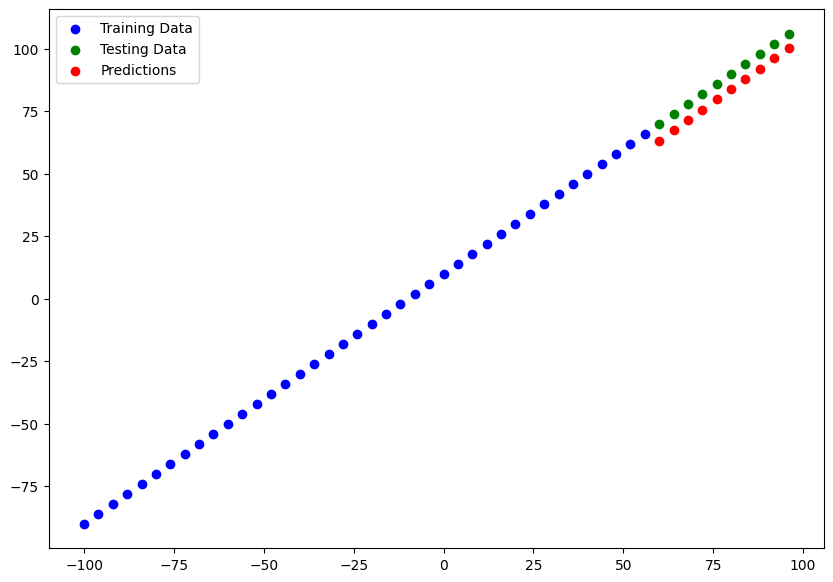

In [81]:
plot_predictions(X_train,y_train ,X_test,y_test,y_predict)

## Evaluating Predictions

Two of the most important evaluation metrics used for Regression Problem are

**Mean Absolute Error (MAE):**
The mean difference between each of the predictions
**Mean Squared Error (MSE)**
The squared mean difference between the predictions.


In [82]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 6.2091 - mae: 6.2091


[6.209136486053467, 6.209136486053467]

**Model.evaluate(X_test, y_test):**
It returns the loss of the model as well as any other metric specified during the compilation step.

## Building more models for evaluation

In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([

                              tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
history1=model1.fit(tf.expand_dims(X_train, axis=-1),
                                     y_train, epochs=100
                                     )


In [ ]:
df = pd.DataFrame(history1.history)
# plot the loss
plt.plot(df["mae"])
plt.show()

In [ ]:
y_preds_1 = model1.predict(X_test)
plot_predictions(X_train,y_train ,X_test,y_test,y_preds_1)

## **Building Model-2**

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
history2=model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=300)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


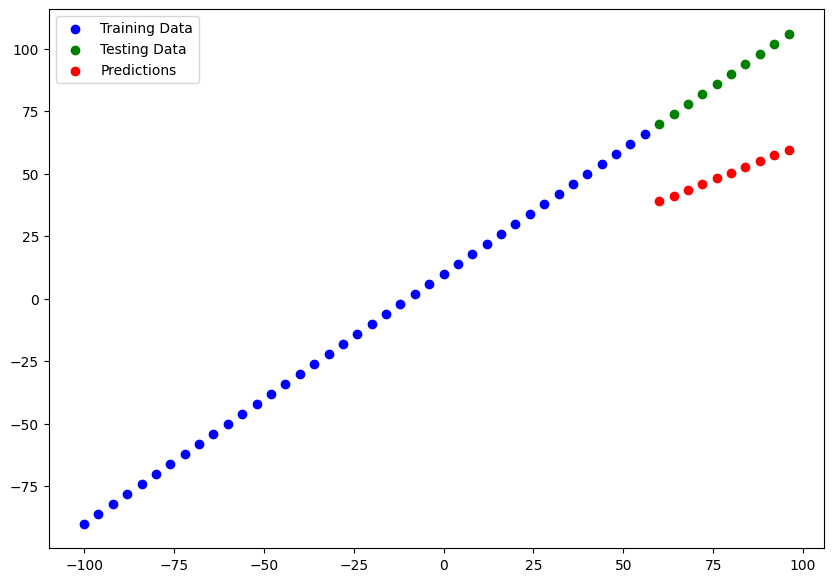

In [93]:
y_pred_2 = model2.predict(X_test)
plot_predictions(X_train,y_train ,X_test,y_test,y_pred_2)

**For Model-3 we will keep everything like Model-2 but we will train for longer epoch=500**

In [ ]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)



In [ ]:
y_pred_3 = model3.predict(X_test)
plot_predictions(X_train,y_train ,X_test,y_test,y_pred_3)

## **Saving Model**

There are two ways to save a model
* SavedModel Format (Default)
* HDF5 Format

Main difference between the two is that SavedModel is automatically able to save custom objects (Such as Layers) without additional modifications when loading the model back in.

In [99]:
model2.save("best_model_Model2.keras")

In [ ]:
!ls best_model_Model2.keras

In [ ]:
model2.save("best_model_Model2.h5")

In [ ]:
!ls best_model_Model2.h5

## **Loading a Model**

In [104]:
load_saved_model = tf.keras.models.load_model("best_model_Model2.keras")

In [ ]:
load_saved_model.summary()

## **A detailed Example**

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head(10)

In [ ]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head(5)

In [8]:
X  = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.shape, y.shape, insurance_one_hot.shape

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                        tf.keras.layers.Dense(1),
                                        tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)



In [15]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8916.5107 - mae: 8916.5107  


[8716.1533203125, 8716.1533203125]

## Changes to the above model
* No of Layers
* No of Neurons per Layer
* Optimization Algorithm from SGD to Adam


In [22]:
tf.random.set_seed(42)

# Adding extra Layers
insurance_model_2 = tf.keras.Sequential([
                                          tf.keras.layers.Dense(100),
                                          tf.keras.layers.Dense(10),
                                          tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history= insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)



In [ ]:
insurance_model_2.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_test, y_test)

In [ ]:
df_insurance_model2 = pd.DataFrame(history.history)
df_insurance_model2.head(5)

In [ ]:
plt.figure(figsize=(10,7))
df_insurance_model2.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Lets' train if for a little longer

In [27]:
history_2 = insurance_model_2.fit(tf.expand_dims(X_train, axis=-1),
                                  y_train, epochs=1000, verbose=0)

In [ ]:
insurance_model_2.mae, insurance_model_2.loss = insurance_model_2.evaluate(X_test,
                                                                           y_test)
insurance_model_2.mae, insurance_model_2.loss

In [ ]:
plt.figure(figsize=(10,7))
df_insurance_model2.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Preprocessing Data (Normalization and Standardization)

* Normalization:- Scaling values from their original range to be between 0 and 1.
X_normalized = (X - X_min) / (X_max - X_min)
* Standardization:- It converts all of your data to unit variance and 0 mean.
x' = (x - mean(x)) / std(x)








In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [34]:
# import column transformer from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(),
                              ["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"),
                              ["sex", "smoker", "region"]))

X = insurance.drop("charges", axis=1)
y= insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform the data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


## Building the Model

In [41]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                          tf.keras.layers.Dense(100),
                                          tf.keras.layers.Dense(10),
                                          tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])


insurance_model_3.fit(X_train_normal, y_train, epochs=100, verbose=0)


In [42]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3518.2375 - mae: 3518.2375  


[3432.478271484375, 3432.478271484375]

## After Normalising input we achieved the best results.